<center><img src="images/header.png"></center>

<h1><center>Лекция №6: Введение в анализ социальных сетей</center></h1>
<hr>
<h1><center>Домашняя работа</center></h1>

Данное ДЗ является довольно творческим и оно требует довольно много самостоятельной работы, так что не стоит с ним мешкать =)

Вам предлагается выбрать сообщество (или сообщества) в сети ВКонтакте и проанализировать его (их) контингент. 


**Правила:**
* Отчеты принимаются до **23:59 11 ноября**. Вы должны залить ваш ноутбук в github дать на него ссылку в следующей [форме](https://forms.gle/88d9CfaJN5gPV4bB8).
* Работоспособность будет проверяться через [colab](https://colab.research.google.com) (можете сразу давать ссылку на него). Если ноутбук не будет исполняться (падать по ошибке) то все, что будет написано после ошибки не будет учитываться при формировании оценки 
* Вы должны включить код, с помощью которого вы общались с API вконтакте, но для экономии времени, заранее предусмотреть возможность загрузки уже собранных данных (например, как это было реализовано в ноутбуках по кластеризации через `wget` и dropbox или raw данными в github)

**Пожелания:**
* Выбирайте для анализа небольшие сообщества (до 5к), желательно чтобы вы сами в них состояли - это ускорит вычисления и упростит интерпретацию
* Отнеситесь к этой работе как к исследованию - больше графиков и комментариев!
* Красивые визуализации лучше делать через gephi!

# Загрузка данных (2 балла)

Изучите следующие материалы
* [Знакомство с API](https://vk.com/dev/first_guide)
* [Туториал](https://nbviewer.jupyter.org/github/allatambov/Py-programming-3/blob/master/15-06/lect-vk-api.ipynb) по выгрузке данных с помощью VKAPI
* Про метод execute - [туть](https://vk.com/dev/execute) и [туть](http://www.cyberforum.ru/python-web/thread1730446.html)

Выберите сообщество и загрузите
* Идентификаторы всех [участников сообщества](https://vk.com/dev/groups.getMembers)
* [Списки друзей](https://vk.com/dev/friends.get) участников и их признаки (пол, возраст, университет и все, что посчитаете нужным - нам потом группировать по этим атрибутам)
* [Пересечение](https://vk.com/dev/friends.getMutual) между списками друзей

Таким образом вы должны получить замкнутую группу аккаунтов с их друзьями и связями между ними.

Далее - соберите их этого граф в networkX и сохраните в graphml или gml формате

**Замечания:**
* Вконтакте может ограничить вам скорость запросов, поэтому иногда имеет смысл ставить небольшую паузу (`time.sleep(1)`) между запросами и сохранять предварительные результаты
* Код выгрузки может быть написан как с помощью модуля `vk` так и просто с помощью requests 


In [266]:
!wget https://raw.githubusercontent.com/anna-gor/Networks/master/1.png -O 1.png
!wget https://raw.githubusercontent.com/anna-gor/Networks/master/2.png -O 2.png
!wget https://raw.githubusercontent.com/anna-gor/Networks/master/3.png -O 3.png
!wget https://raw.githubusercontent.com/anna-gor/Networks/master/4.png -O 4.png
!wget https://raw.githubusercontent.com/anna-gor/Networks/master/5.png -O 5.png
!wget https://raw.githubusercontent.com/anna-gor/Networks/master/6.png -O 6.png
!wget https://raw.githubusercontent.com/anna-gor/Networks/master/edjes.json -O edjes.json
!wget https://raw.githubusercontent.com/anna-gor/Networks/master/nodes.json -O nodes.json
!wget https://raw.githubusercontent.com/anna-gor/Networks/master/vk_graphg.graphml -O vk_graphg.graphml


--2019-11-11 18:20:44--  https://raw.githubusercontent.com/anna-gor/Networks/master/1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 938556 (917K) [image/png]
Saving to: ‘1.png’

1.png               100%[===================>] 916.56K  --.-KB/s    in 0.08s   

2019-11-11 18:20:45 (11.0 MB/s) - ‘1.png’ saved [938556/938556]

--2019-11-11 18:20:47--  https://raw.githubusercontent.com/anna-gor/Networks/master/2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 730991 (714K) [image/png]
Saving to: ‘2.png’

2.png               100%[=======

In [0]:
### Здесь должен быть код загрузки из VK
### Его можно закомментировать
'''
import vk
import time
token = '88741aa73e57451e23d384654b58440ea420785eb4fead631b4778ea43018c3210f00cbc63edca48bc3ca'
session = vk.Session(access_token = token) # открыть сессию для работы
api = vk.API(session) # подключиться к API
'''

In [0]:
#group = 'mm207msu'

In [0]:
'''
#Загружаем членов группы
mems = api.groups.getMembers(group_id=group,fields=[ 'sex', 'bdate', 'city', 'country', 'universities'], v = 5.89)
#Оставляем только аккаунты, к которым есть доступ
nodes1=[]
for i in range(len(mems['items'])):
    if 'deactivated' in mems['items'][i].keys():
        if mems['items'][i]['deactivated']!='banned' and mems['items'][i]['deactivated']!='deleted':
            nodes1.append(mems['items'][i])
    elif 'is_closed' in mems['items'][i].keys():
        if (mems['items'][i]['is_closed']==False):
            nodes1.append(mems['items'][i])
#Cловарь с участниками группы
nodegr={}
for i in nodes1:
    nodegr[str(i['id'])]=i
group=list(nodegr.keys()) #Cписок id участников

#Словарь с друзьями
nodesfr={}
listfriends=[]
for i in group:
    friends=api.friends.get(user_id=int(i), fields=[ 'sex', 'bdate', 'city', 'country', 'universities'], v = 5.89)
    print(i, friends['count'])
    l=[]
    for friend in friends['items']:
        if 'deactivated' in friend.keys():
            if friend['deactivated']!='banned' and friend['deactivated']!='deleted':
                nodesfr[str(friend['id'])]=friend
                l.append(friend['id'])
        elif 'is_closed' in friend.keys():
            if (friend['is_closed']==False):
                nodesfr[str(friend['id'])]=friend
                l.append(friend['id'])
    listfriends.append(l)
    
    time.sleep(0.4) 
nodes={**nodegr, **nodesfr} #Общий словарь(совпадает со словарем друзей)
mems=list(nodes.keys()) #Cписок всех id

#Добавляем к ребрам имеющиеся списки друзей
com_fr={}
for i in range(len(group)):
    com_fr[str(group[i])]=listfriends[i]
    
#Добавляем ребра между друзьями и друзьями и членами группы
for i in range(len(group)):
    for j in range(len(group)):
        k=0
        while(k<len(listfriends[j])):
            mutual=api.friends.getMutual(source_uid=group[i], target_uids=listfriends[j][k:k+100],v = 5.73)
            time.sleep(0.3)
            for l in mutual:
                if str(l['id']) not in com_fr.keys():
                    com_fr[str(l['id'])]=l['common_friends']
                else:
                    com_fr[str(l['id'])]=list(set(com_fr[str(l['id'])]+l['common_friends']))
                    
            k=k+100
#Оставляем только те вершины, для которых была скачана информация (участники группы и их друзья)
for i in mems:
    com_fr[str(i)]=list((Counter([int(item) for item in mems]) & Counter(com_fr[str(i)])).elements())
    
with open('nodes.json', 'w') as f:
    json.dump(nodes, f)
with open('edjes.json', 'w') as f:
    json.dump(com_fr, f)
'''

In [0]:
### Здесь должен быть код преобразования в граф и сохранение в файл
### Его тоже можно закомментировать
import json
import numpy as np
import networkx as nx
from collections import Counter 
with open('nodes.json', 'r') as fin:
    friends_temp = json.load(fin)
friends1=friends_temp 
keys=[i for i in list(friends_temp.keys())]
for i in keys:
    if  'universities' in friends1[i].keys() and len(friends1[i]['universities'])>0:
        friends_temp[i]['university_name']=friends1[i]['universities'][0]['name']
for i in keys:
    if  'city' in friends1[i].keys():
        friends_temp[i]['city_name']=friends1[i]['city']['title']
for i in keys:
    if  'country' in friends1[i].keys():
        friends_temp[i]['country_name']=friends1[i]['country']['title']
for i in keys:
    if  'universities' in friends1[i].keys() and len(friends1[i]['universities'])>0:
        if 'faculty_name' in friends1[i]['universities'][0]:
            friends_temp[i]['faculty_name']=friends1[i]['universities'][0]['faculty_name']
friends = dict()
for k in friends_temp.keys():
    friends[int(k)] = friends_temp[k]
    
with open('edjes.json', 'r') as fin:
    common_friends_temp = json.load(fin)
common_friends = dict()
for k in common_friends_temp.keys():
    common_friends[int(k)] = common_friends_temp[k]


g = nx.Graph()

g.add_nodes_from((fid, {'sex': friend.get('sex', -1), 
                        'first_name': friend.get('first_name', -1), 
                        'last_name': friend.get('last_name', -1), 
                        'university_name': friend.get('university_name', -1),
                        'city_name': friend.get('city_name', -1),
                       'country_name': friend.get('country_name', -1),
                       'faculty_name': friend.get('faculty_name', -1)}) for fid, friend in friends.items())
g.add_edges_from((f1, f2) for f1, f_list in common_friends.items() for f2 in f_list)
nx.write_graphml(g, 'vk_graphg.graphml')


In [0]:
### Здесь код, который загружает сохраненную сеть
import networkx as nx
nx.write_graphml(g, 'vk_graphg.graphml')

# Визуализация (1 балл)

* Откройте полученный граф в gephi
* Выберите наиболее удачный на ваш взгляд алгоритм прорисовки
* Добавьте изменение размера вершины в зависимости от степени вершины
* Вставьте скрин-шот ниже

In [0]:
### Ваши картинки и комментарии ниже

<img src='https://raw.githubusercontent.com/anna-gor/Networks/master/1.png'>

Алгоритм прорисовки - Force Atlas.
Чем больше степень вершины, тем больше ее размер.
Вершины раскрашены в разные цвета в зависимости от пола (синий - мужской, розовый - женский, зеленый - не указан)

# Центральности вершин (1.5 балла)

Возможно, перед тем как пойти дальше, стоит немного почитстить граф - с помощью [kcore](https://www.google.com/search?client=firefox-b-d&q=networkx+kcore)

* Найдите наиболее влиятельные вершины с точки зрения degree, closeness и betweenness centrality
* Выделите их на картинке в gephi

In [0]:
### Ваш код, картинки и комментарии ниже
g1=nx.k_core(g,9)
betw=nx.betweenness_centrality(g1)
close=nx.closeness_centrality(g1)
degr=dict(g1.degree(list(g1.nodes())))

In [0]:
nx.set_node_attributes(g1,close,'close_cent')
nx.set_node_attributes(g1,betw,'betw_cent')
nx.set_node_attributes(g1,degr,'degr')
nx.write_graphml(g1, 'vk_graphgg1.graphml')

Будем обозначать первую по порядку вершину - красным  
Вторую - синим  
Третью - зеленым   
Размер отображает значение соответствующего признака

In [7]:
print('Hаиболее влиятельные вершины с точки зрения degree:\n',sorted(degr.items(), key= lambda x:x[1], reverse = True)[:3] )

Hаиболее влиятельные вершины с точки зрения degree:
 [(33436943, 269), (59401294, 266), (248428655, 252)]


<img src='https://raw.githubusercontent.com/anna-gor/Networks/master/2.png' width="550"/>

Все три вершины действительно обозначают людей с наибольшим количеством друзей.

In [8]:
print('Hаиболее влиятельные вершины с точки зрения closeness:\n',sorted(close.items(), key= lambda x:x[1], reverse = True)[:3] )

Hаиболее влиятельные вершины с точки зрения closeness:
 [(59401294, 0.5413687436159347), (120889121, 0.513234344738541), (88282737, 0.4990583804143126)]


<img src='https://raw.githubusercontent.com/anna-gor/Networks/master/3.png' width="550"/>

Среди вершин встречается одна из вершин из предыдущего пункта (с наибольшими степенями). Здесь у нее максимальное значение closeness и она относится к старосте и основательнице сообщества.

In [9]:
print('Hаиболее влиятельные вершины с точки зрения betweenness centrality:\n',sorted(betw.items(), key= lambda x:x[1], reverse = True)[:3] )

Hаиболее влиятельные вершины с точки зрения betweenness centrality:
 [(33436943, 0.18116786750789704), (59401294, 0.17171045305730148), (32981792, 0.1214118193247677)]


<img src='https://raw.githubusercontent.com/anna-gor/Networks/master/4.png' width="550"/>

Вершина с максимальным значением betweenness centrality имеет так же и максимальную степень. На втором месте так же находится вершина, которая была замечена в предыдущих двух пунктах и относится к старосте и основательнице группы.

# Сообщества... в сообществе (1.5 балла)

Выберите алгоритм выделения сообществ на графах и алгоритм на основе похожести вершин. Для обоих вариантов
* Выделите сообщества, опираясь на максимальное значение модулярности для полученного разбиения
* Изобразите граф с вершинами, раскрашенными в цвет своего сообщества в gephi
* Попробуйте проинтерпретировать полученные сообщества, кто эти люди, почему они всязаны?
* Какой метод на ваш взгляд сработал лучше?

In [90]:
### Ваш код, картинки и комментарии ниже
g2=nx.k_core(g,18)
print(g2.number_of_nodes())
nx.write_graphml(g2, 'vk_graphgg2.graphml')

826


In [0]:
from itertools import product
def modularity(G, communities, weight='weight'):
    multigraph = G.is_multigraph()
    directed = G.is_directed()
    m = G.size(weight=weight)
    if directed:
        out_degree = dict(G.out_degree(weight=weight))
        in_degree = dict(G.in_degree(weight=weight))
        norm = 1 / m
    else:
        out_degree = dict(G.degree(weight=weight))
        in_degree = out_degree
        norm = 1 / (2 * m)

    def val(u, v):
        try:
            if multigraph:
                w = sum(d.get(weight, 1) for k, d in G[u][v].items())
            else:
                w = G[u][v].get(weight, 1)
        except KeyError:
            w = 0
        # Double count self-loops if the graph is undirected.
        if u == v and not directed:
            w *= 2
        return w - in_degree[u] * out_degree[v] * norm

    Q = sum(val(u, v) for c in communities for u, v in product(c, repeat=2))
    return Q * norm

### Aлгоритм выделения сообществ на графах

In [38]:
i = 0
final_mod = 0
eb_partitions = nx.community.girvan_newman(g2)
print('Girvan_newman')
for partition in eb_partitions:
    print(i)
    i += 1
    num_com = len(partition)
    if num_com < 10:
        mod = modularity(g2, partition)
        if (mod > final_mod):
            final_mod = mod
            final_partition = partition
        print('For {} communities modularity = {}'.format(num_com, mod))
    else:
        break

Girvan_newman
0
For 2 communities modularity = 0.22782639618719658
1
For 3 communities modularity = 0.34803094150976743
2
For 4 communities modularity = 0.42905632091850976
3
For 5 communities modularity = 0.4541832478624633
4
For 6 communities modularity = 0.45390172544106455
5
For 7 communities modularity = 0.45361955121364894
6
For 8 communities modularity = 0.4533548060263418
7
For 9 communities modularity = 0.4531915475775033
8


In [0]:
eb_labeling={}
for i in range(len(final_partition)):
    for j in final_partition[i]:
        eb_labeling[j]=i

In [0]:
nx.set_node_attributes(g2,eb_labeling,'eb_labeling')
nx.set_node_attributes(g2,close,'close_cent')
nx.set_node_attributes(g2,betw,'betw_cent')

In [0]:
nx.write_graphml(g2, 'vk_graphg2.graphml')

<img src='https://raw.githubusercontent.com/anna-gor/Networks/master/5.png' width="550"/>

0 группа (голубая) - люди, у которых в основном не указан вуз, многие из них из Казани, т.к. в группе есть человек с большим количеством друзей, который приехал из Казани.  
1 группа (розовая) - Преимущественно люди с механико-математического факультета МГУ, что логично, т.к. само сообщество - одногруппники с мехмата.  
2 группа (темно-зеленая) - группа людей из Королева, друзья старосты группы, которая живет в Королеве.  
3 группа(салатовая) - люди, учащиеся в РЭУ им. Плеханова. Туда перевелся один из одногруппников, у которого много друзей (его вершина была наибольшей по степени)  
4 группа (оранжевая) - остальные. Люди из разных вузов, разных городов.
То есть группы интерпретируются.

###Алгоритм на основе похожести вершин

In [0]:
dicti={}
k=0
for i in list(g.nodes()):
  dicti[i]=k
  k=k+1

In [0]:
friends = dict()
for k in friends_temp.keys():
    friends[dicti[int(k)]] = friends_temp[k]

In [0]:
common_friends = dict()
for k in common_friends_temp.keys():
    l=[]
    for i in common_friends_temp[k]:
        l.append(dicti[i])
    common_friends[dicti[int(k)]] = l

In [0]:
g1 = nx.Graph()
g1.add_nodes_from((fid, {'sex': friend.get('sex', -1), 
                        'first_name': friend.get('first_name', -1), 
                        'last_name': friend.get('last_name', -1), 
                        'university_name': friend.get('university_name', -1),
                        'city_name': friend.get('city_name', -1),
                       'country_name': friend.get('country_name', -1)}) for fid, friend in friends.items())
g1.add_edges_from((f1, f2) for f1, f_list in common_friends.items() for f2 in f_list)

In [0]:
def get_keys(d, value):
    a=set()
    for k, v in d.items():
        if v == value:
            a.add(k)
    return a

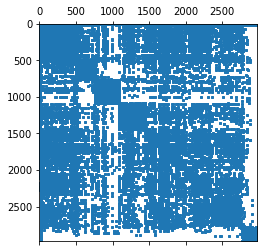

In [241]:
import matplotlib.pyplot as plt
A = nx.adj_matrix(g1)
plt.spy(A, markersize=2)

In [0]:
jac = nx.jaccard_coefficient(g1)
jac = np.array(list(jac))

In [243]:
jac

array([[0.00000000e+00, 4.00000000e+00, 8.62068966e-03],
       [0.00000000e+00, 6.00000000e+00, 5.18134715e-02],
       [0.00000000e+00, 1.10000000e+01, 4.80769231e-02],
       ...,
       [2.97300000e+03, 2.97400000e+03, 1.00000000e+00],
       [2.97300000e+03, 2.97500000e+03, 1.00000000e+00],
       [2.97400000e+03, 2.97500000e+03, 1.00000000e+00]])

In [0]:
from scipy.sparse import coo_matrix

# Переводим все в формат разреженной матрицы
D = coo_matrix((jac[:,2], (jac[:,0], jac[:,1])), shape=(2976,2976))

# Делаем ее симметричной
D = D+D.T

In [0]:
from sklearn.cluster import SpectralClustering

In [255]:
for num_clust in range(5,15):
  model = SpectralClustering(n_clusters=num_clust, affinity='precomputed')
  model.fit(D)
  labels = model.labels_
  labels = model.labels_labels=[int(i) for i in labels]
  versh={}
  k=0
  for i in g.nodes:
      versh[i]=labels[k]
      k=k+1
  print(num_clust, modularity(g, tuple(get_keys(versh, i) for i in range(num_clust))))

5 0.35777999082256917
6 0.36697371932105544
7 0.46383185645275776
8 0.46844822874187503
9 0.4754819735678238
10 0.47585804135690946
11 0.4940440784322394
12 0.49602579688893467
13 0.4949249780669141
14 0.494926890394034


In [0]:
model = SpectralClustering(n_clusters=12, affinity='precomputed')
model.fit(D)
labels = model.labels_
labels = model.labels_labels=[int(i) for i in labels]
versh={}
k=0
for i in g.nodes:
  versh[i]=labels[k]
  k=k+1

<img src='https://raw.githubusercontent.com/anna-gor/Networks/master/6.png' width="550"/>

Граф довольно неплохо разбился на 12 классов. Кластеров оказалось больше, поскольку были задействованы все вершины. Но большую часть всех верших охватывают где-то первые 6 классов.  
При этом они очень похожи на кластеры, получившиеся в предыдущем разбиении.


In [0]:
nx.set_node_attributes(g1,versh,'versh')
nx.write_graphml(g1, 'vk_graphggg11.graphml')

# Асортативность по признакам (1.5 балла)

* Посчитайте коэффициенты асортативности для признаков вершин (пол, возраст, университет, школа, город, количество друзей, etc)
* Проинтерпретируйте полученные результаты

In [122]:
### Ваш код, картинки и комментарии ниже
attributes=['sex', 'first_name', 'last_name', 'university_name', 'city_name', 'country_name', 'faculty_name']
for attr in attributes:
    print('{} assortativity = {}'.format(attr, 
                                         nx.assortativity.attribute_assortativity_coefficient(g2 , attr)))

sex assortativity = 0.12063521785575668
first_name assortativity = 0.002334264027122223
last_name assortativity = -0.0010702577374035098
university_name assortativity = 0.14436884301974018
city_name assortativity = 0.11418265855325656
country_name assortativity = 0.014637416020743971
faculty_name assortativity = 0.09526384306264211


Самая высокая асортативность - у пола, города,университета.  
Меньше - у страны и факультета.  
Наименьшая - у имени и фамилии.  
Это можно проинтерпретировать как то, что чаще всего мы добавляем в друзья людей своего пола, из своего города и университета, так как эти признаки характеризуют некоторые общие интересы, на почве которых могут познакомиться и подружиться люди. Страна и факультет уже не столь значимые признаки, но все равно среди наших друзей чаще встречаются люди из нашей страны, а так же люди с нашего факультета. Так же стоит отметить, что название факультета указывается реже, чем название университета, что тоже может повлиять на значение асортативности. И наименее значимые признаки - имя и фамилия. Они разные у всех людей и не влияют на образование дружеских связей. При этом коэффициент у имени выше, так как повторяющихся имен больше, чем фамилий.